# **Analyzing the features that impact on Developer Salaries Using Machine Learning - Project Data Science Blog**

The goal of this project is to analyze how different factors (education levels, country, work experience, platforms used and other) influence developer salaries and build a machine learning model to predict salaries based on education and other factors.

Author: Carolina Barros

### Table of Contents
1. [Introduction & Objective](#1-introduction--objective)
2. [Importing Libraries](#2-importing-libraries)
3. [Loading the Dataset](#3-loading-the-dataset)
4. [Data Cleaning & Preprocessing](#4-data-cleaning--preprocessing)
5. [Exploratory Data Analysis (EDA)](#5-exploratory-data-analysis-eda)
6. [Feature Engineering](#6-feature-engineering-if-applicable)
7. [Splitting Data into Training & Testing Sets](#7-splitting-data-into-training--testing-sets)
8. [Model Training](#8-model-training)
9. [Model Performance Metrics](#9-model-performance-metrics)
10. [Conclusion & Future Work](#10-conclusion--future-work)


### 1. Introduction & Objective
This notebook analyzes the dataset and builds a predictive model.


### 2. Importing Libraries

In [76]:
# Required libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

### 3. Loading the Dataset

In [2]:
# Load dataset , that I prepared in the notebook data_preparation
df = pd.read_csv("../data/dataset.csv")
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Display first few rows
df.head()

,ResponseId,Age,Employment,RemoteWork,EdLevel,YearsCodePro,DevType,OrgSize,Country,LanguageHaveWorkedWith,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,WebframeHaveWorkedWith,WorkExp,Industry,JobSat,ConvertedCompYearly
0,73,18-24 years old,"Employed, full-time;Student, full-time;Indepen...","Hybrid (some remote, some in-person)","Secondary school (e.g. American high school, G...",1,Data scientist or machine learning specialist,100 to 499 employees,Pakistan,Assembly;Bash/Shell (all shells);C;C++;HTML/CS...,MongoDB;MySQL;SQLite,Microsoft Azure;VMware,Angular;AngularJS;Express;FastAPI;Flask;jQuery...,3.0,Software Development,10.0,7322.0
1,380,35-44 years old,"Employed, full-time",Remote,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,Data scientist or machine learning specialist,20 to 99 employees,Turkey,JavaScript;Julia;Python;SQL;TypeScript,DuckDB;PostgreSQL;SQLite,Amazon Web Services (AWS);Cloudflare;Digital O...,Next.js;React;Vue.js,7.0,Computer Systems Design and Services,10.0,91295.0
2,390,25-34 years old,"Employed, full-time;Student, part-time",Remote,Some college/university study without earning ...,7,Student,10 to 19 employees,United States of America,HTML/CSS;JavaScript;Python;SQL;TypeScript,IBM DB2;MySQL;SQLite,Amazon Web Services (AWS),FastAPI;Flask;Node.js;Vue.js,8.0,"Transportation, or Supply Chain",10.0,110000.0
3,393,35-44 years old,"Employed, full-time","Hybrid (some remote, some in-person)","Professional degree (JD, MD, Ph.D, Ed.D, etc.)",18,Engineering manager,"1,000 to 4,999 employees",United Kingdom of Great Britain and Northern I...,C#;HTML/CSS;Java;JavaScript;MicroPython;Python...,BigQuery;Oracle;PostgreSQL,Amazon Web Services (AWS),React,18.0,Retail and Consumer Services,7.0,161044.0
4,399,45-54 years old,"Employed, full-time",Remote,Some college/university study without earning ...,30,"Developer, full-stack","1,000 to 4,999 employees",United States of America,Bash/Shell (all shells);C#;HTML/CSS;JavaScript...,Microsoft SQL Server;PostgreSQL;Snowflake,Microsoft Azure,Angular;ASP.NET CORE;React,30.0,Healthcare,5.0,195000.0


In [3]:
# Check the dataframe columns
df.columns

Index(['ResponseId', 'Age', 'Employment', 'RemoteWork', 'EdLevel',
       'YearsCodePro', 'DevType', 'OrgSize', 'Country',
       'LanguageHaveWorkedWith', 'DatabaseHaveWorkedWith',
       'PlatformHaveWorkedWith', 'WebframeHaveWorkedWith', 'WorkExp',
       'Industry', 'JobSat', 'ConvertedCompYearly'],
      dtype='object')

In [4]:
# Initial Data Exploration 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10137 entries, 0 to 10136
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ResponseId              10137 non-null  int64  
 1   Age                     10137 non-null  object 
 2   Employment              10137 non-null  object 
 3   RemoteWork              10137 non-null  object 
 4   EdLevel                 10137 non-null  object 
 5   YearsCodePro            10137 non-null  object 
 6   DevType                 10137 non-null  object 
 7   OrgSize                 10137 non-null  object 
 8   Country                 10137 non-null  object 
 9   LanguageHaveWorkedWith  10137 non-null  object 
 10  DatabaseHaveWorkedWith  10137 non-null  object 
 11  PlatformHaveWorkedWith  10137 non-null  object 
 12  WebframeHaveWorkedWith  10137 non-null  object 
 13  WorkExp                 10137 non-null  float64
 14  Industry                10137 non-null

### 4. Data Cleaning & Preprocessing

In [5]:
# Check unique values of Employement column
df['Employment'].unique()

array(['Employed, full-time;Student, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time',
       'Employed, full-time', 'Employed, full-time;Student, part-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed',
       'Independent contractor, freelancer, or self-employed',
       'Employed, full-time;Student, full-time',
       'Independent contractor, freelancer, or self-employed;Employed, part-time',
       'Employed, part-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed;Student, part-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time',
       'Student, full-time;Employed, part-time',
       'Independent contractor, freelancer, or self-employed;Student, part-time',
       'Student, part-time;Employed, part-time',
       'Employed, full-time;Not employed, but looking for work',
       'Employed, full-time;Employed, part-time'

In [6]:
# Filter rows where 'employment_status' contains 'Employed, full-time'  
# I think analyzing only full-time employees could provide more accurate salary insights.
df = df[df['Employment'].str.contains('Employed, full-time', na=False)]

In [7]:
# Drop 'Employement' column
df = df.drop(['Employment'], axis=1)

In [8]:
# Check unique values in the 'DevType' variable to determine the number of job categories.
df['DevType'].value_counts()

DevType
Developer, full-stack                            4029
Developer, back-end                              2171
Developer, front-end                              441
Engineering manager                               302
Developer, desktop or enterprise applications     243
Other (please specify):                           236
DevOps specialist                                 184
Data engineer                                     174
Developer, mobile                                 164
Senior Executive (C-Suite, VP, etc.)              151
Data scientist or machine learning specialist     132
Cloud infrastructure engineer                     118
Research & Development role                       105
Developer, embedded applications or devices        83
Developer, AI                                      80
Developer, QA or test                              69
Engineer, site reliability                         69
Academic researcher                                47
Data or business ana

The 'DevType' variable contains a large number of categories, making analysis complex. To simplify it, I propose the following groupings:  
- **Software Developer:** Developer (full-stack, back-end, front-end, mobile, desktop/enterprise applications, embedded applications, game/graphics, AI, QA/test)
- **Data & AI:** Data Scientist or Machine Learning Specialist, Data Engineer, Data or Business Analyst, Developer, AI, Infrastructure & DevOps
- **DevOps Specialist:** Cloud Infrastructure Engineer, Site Reliability Engineer, System Administrator, Management & Leadership
- **Engineering Manager:** Project Manager, Product Manager, Senior Executive (C-Suite, VP, etc.)
- **Academic & Research:** Academic Researcher, Research & Development Role, Scientist,Educator, Student
- **Security & Database:** Security Professional, Database Administrator, 
- **Other Technical Roles:** Blockchain, Developer Advocate, Developer Experience, Hardware Engineer, 
- **Non-Technical Roles:** Designer, Marketing or Sales Professional, Other

In [9]:
# Grouping and creating a new variable 'role_category' from the 'DevType' variable  
# Using a mapping dictionary for categorization  
category_map = {
    'Developer, full-stack': 'Software Developer',
    'Developer, back-end': 'Software Developer',
    'Developer, front-end': 'Software Developer',
    'Developer, mobile': 'Software Developer',
    'Developer, desktop or enterprise applications': 'Software Developer',
    'Developer, embedded applications or devices': 'Software Developer',
    'Developer, game or graphics': 'Software Developer',
    'Developer, AI': 'Data & AI',
    'Developer, QA or test': 'Software Developer',
    'Data scientist or machine learning specialist': 'Data & AI',
    'Data engineer': 'Data & AI',
    'Data or business analyst': 'Data & AI',
    'Cloud infrastructure engineer': 'Infrastructure & DevOps',
    'Engineer, site reliability': 'Infrastructure & DevOps',
    'DevOps specialist': 'Infrastructure & DevOps',
    'System administrator': 'Infrastructure & DevOps',
    'Engineering manager': 'Management & Leadership',
    'Project manager': 'Management & Leadership',
    'Product manager': 'Management & Leadership',
    'Senior Executive (C-Suite, VP, etc.)': 'Management & Leadership',
    'Academic researcher': 'Academic & Research',
    'Research & Development role': 'Academic & Research',
    'Scientist': 'Academic & Research',
    'Security professional': 'Security & Database',
    'Database administrator': 'Security & Database',
    'Blockchain': 'Other Technical Roles',
    'Developer Advocate': 'Other Technical Roles',
    'Developer Experience': 'Other Technical Roles',
    'Hardware Engineer': 'Other Technical Roles',
    'Designer': 'Non-Technical Roles',
    'Marketing or sales professional': 'Non-Technical Roles',
    'Educator': 'Academic & Research',
    'Student': 'Academic & Research',
    'Other (please specify):': 'Non-Technical Roles'
}

# Apply mapping
df['role_category'] = df['DevType'].map(category_map)


In [10]:
df['role_category'].value_counts()

role_category
Software Developer         7227
Management & Leadership     520
Data & AI                   425
Infrastructure & DevOps     407
Non-Technical Roles         248
Academic & Research         203
Other Technical Roles        79
Security & Database          51
Name: count, dtype: int64

The majority of the surveyed people have developer role, I am going to keep only the developer role ones. 

In [11]:
# Filter Software Developers from the dataset
df = df[df['role_category'] == 'Software Developer']

# Drop Employement column
df = df.drop(['role_category'], axis=1)

In [12]:
# Check unique values in the 'LanguageHaveWorkedWith' variable to identify popular languages among surveyed developers.
df['LanguageHaveWorkedWith'].value_counts()

LanguageHaveWorkedWith
HTML/CSS;JavaScript;TypeScript                                                             129
C#;HTML/CSS;JavaScript;SQL;TypeScript                                                      107
C#;HTML/CSS;JavaScript;SQL                                                                  74
HTML/CSS;JavaScript;PHP;SQL                                                                 66
C#;HTML/CSS;JavaScript;PowerShell;SQL;TypeScript                                            60
                                                                                          ... 
Bash/Shell (all shells);Go;Groovy;HTML/CSS;Java;JavaScript;Kotlin;Python;SQL                 1
Bash/Shell (all shells);Go;Java;JavaScript;Lisp;Python;Rust;SQL;TypeScript                   1
Bash/Shell (all shells);C;C++;HTML/CSS;Java;JavaScript;Lua;PowerShell;Python;Rust;Swift      1
HTML/CSS;JavaScript;Perl;SQL;TypeScript;VBA                                                  1
C#;C++;HTML/CSS;JavaScript;

### Creating Variables for Technology Experience  

Create variables to track the number of languages, databases, platforms, and web frameworks that developers have worked with. Additionally, generate variables that select the first option from each technology category, assuming this represents the developer's preferred choice.


In [13]:
# Create the new column with the number of languages
df['num_languages'] = df['LanguageHaveWorkedWith'].apply(lambda x: len(x.split(';')))

# Create the new column with the number of databases have worked with
df['num_databases'] = df['DatabaseHaveWorkedWith'].apply(lambda x: len(x.split(';')))

# Create the new column with the number of platforms have worked with
df['num_platforms'] = df['PlatformHaveWorkedWith'].apply(lambda x: len(x.split(';')))

# Create the new column with the number of webframes have worked with
df['num_webframes'] = df['WebframeHaveWorkedWith'].apply(lambda x: len(x.split(';')))

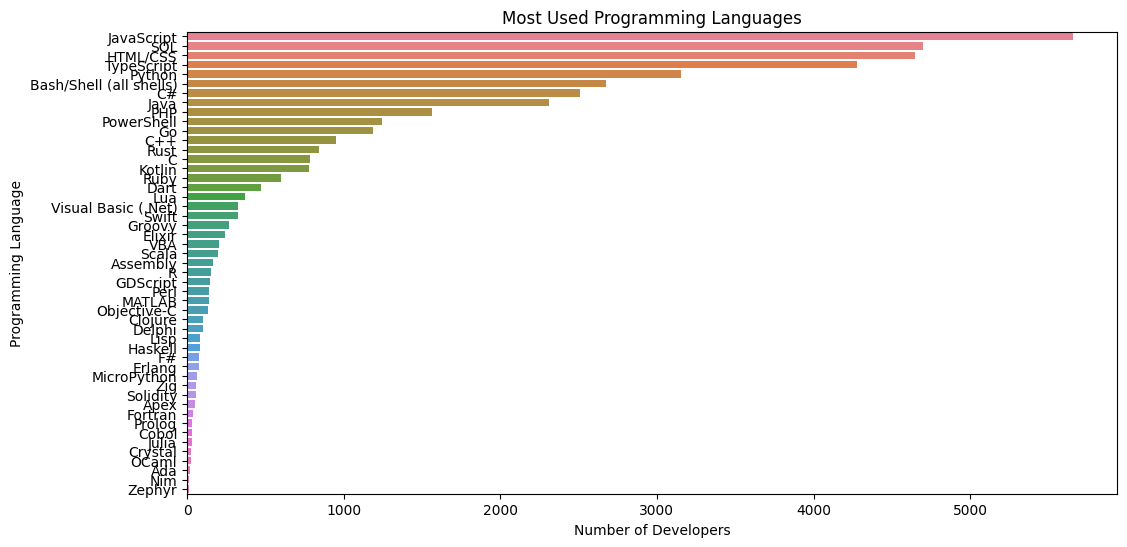

In [14]:
from collections import Counter
# Flatten all languages into a single list
all_languages = ";".join(df["LanguageHaveWorkedWith"]).split(";")
language_counts = Counter(all_languages)

# Convert to DataFrame
df_language_counts = pd.DataFrame(language_counts.items(), columns=['Language', 'Count'])
df_language_counts = df_language_counts.sort_values(by="Count", ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=df_language_counts['Count'], y=df_language_counts['Language'], hue=df_language_counts['Language'])
plt.xlabel("Number of Developers")
plt.ylabel("Programming Language")
plt.title("Most Used Programming Languages")
plt.show()

In [15]:
# Create a new variable for languages,  instead of using all 28 languages, I'll focus on the top 3 high-paying ones. Source: https://pesto.tech/resources/top-10-highest-paying-programming-languages-in-2024#:~:text=It's%20important%20to%20know%20which,your%20career%20and%20earning%20potential.
high_paying_languages = ['Rust', 'Go', 'Scala']

for lang in high_paying_languages:
    df[lang] = df['LanguageHaveWorkedWith'].apply(lambda x: 1 if lang in x else 0)

df['High_Paying_Langs'] = df['LanguageHaveWorkedWith'].apply(lambda x: 1 if any(db in x for db in high_paying_languages) else 0)

These languages tend to be associated with higher salaries, so checking their impact makes sense.

In [16]:
high_paying_platforms = {'Amazon Web Services (AWS)', 'Kubernetes', 'VMware', 'Google Cloud'}

df['High_Paying_Platforms'] = df['PlatformHaveWorkedWith'].apply(lambda x: 1 if any(p in x for p in high_paying_platforms) else 0)

In [18]:
# Define platform categories
cloud_platforms = {'Amazon Web Services (AWS)', 'Microsoft Azure', 'Google Cloud'}
# Create new binary columns
df['Cloud_Platform'] = df['PlatformHaveWorkedWith'].apply(lambda x: 1 if any(p in x for p in cloud_platforms) else 0)

In [19]:
correlation = df.corr(numeric_only=True)['ConvertedCompYearly'].sort_values(ascending=False)
print(correlation)

ConvertedCompYearly      1.000000
WorkExp                  0.243751
Cloud_Platform           0.085836
High_Paying_Platforms    0.066826
High_Paying_Langs        0.057211
Rust                     0.055136
Scala                    0.044095
JobSat                   0.043624
Go                       0.028526
num_languages            0.007379
ResponseId              -0.023197
num_platforms           -0.033437
num_databases           -0.038599
num_webframes           -0.072556
Name: ConvertedCompYearly, dtype: float64


In [20]:
# Drop columns LanguageHaveWorkedWith,DatabaseHaveWorkedWith, PlatformHaveWorkedWith, WebframeHaveWorkedWith.
df = df.drop(['DevType','LanguageHaveWorkedWith','DatabaseHaveWorkedWith', 'PlatformHaveWorkedWith','WebframeHaveWorkedWith'], axis=1)

In [21]:
# First exploration of descriptive statistics for numeric variables.
df.describe()

,ResponseId,WorkExp,JobSat,ConvertedCompYearly,num_languages,num_databases,num_platforms,num_webframes,Rust,Go,Scala,High_Paying_Langs,High_Paying_Platforms,Cloud_Platform
count,7227.000000,7227.000000,7227.000000,7.227000e+03,7227.000000,7227.000000,7227.000000,7227.000000,7227.000000,7227.000000,7227.000000,7227.000000,7227.000000,7227.000000
mean,20034.314515,10.607583,6.968728,8.000682e+04,5.836170,3.376920,2.358655,3.878234,0.116508,0.164522,0.027259,0.255708,0.702920,0.857341
std,11603.019010,8.258379,2.050394,1.125345e+05,2.900653,2.156334,1.675699,2.628930,0.320855,0.370774,0.162848,0.436288,0.457004,0.349749
min,399.000000,0.000000,0.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9772.500000,4.000000,6.000000,3.200100e+04,4.000000,2.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,19902.000000,8.000000,7.000000,6.465900e+04,5.000000,3.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,29646.500000,15.000000,8.000000,1.052580e+05,7.000000,4.000000,3.000000,5.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,41179.000000,50.000000,10.000000,6.340564e+06,28.000000,19.000000,15.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- Work experience: min value of 0 and max value of 50 years. Maybe hear there are some error 50 years seem a lot. Most developers have 11 years of expereince. 
- Converted Compensation Yearly: 
- Num Languages:
- Num Databases:
- Num Platforms:
- Num Webframes:

In [22]:
# Detect outliers

# Function to get the number of outliers using IQR (Interquantile Range) method:

def outliers_iqr(df, columns, iqr_multiplier = 1.5):
    
    """Detect outliers in columns in a dataframe using the IQR method and returns a dataframe with # outliers, 
    IQR value, and upper and lower limits.
    Parameters:
    df: dataframe
    columns: list of columns names to detect outliers 
    iqr_multiplier: default value 1.5 (the closest to what Gaussian Distribution considers for outlier detection)
    
    Returns:
    results_df: dataframe with the results of the oultier detection"""
    
    results = []
    for column in columns:
        # Calculate quartiles and IQR
        q1, q3 = np.quantile(df[column], [0.25,0.75])
        iqr = q3 - q1
        
        # Calculate lower and upper limits
        lower_limit = q1 - iqr_multiplier * iqr
        upper_limit = q3 + iqr_multiplier * iqr
        
        # Count the number of outilers
        num_outliers = ((df[column] < lower_limit) | (df[column] > upper_limit)).sum()

         # Calculate the percentage of outliers
        total_values = len(df[column])
        outlier_percentage = (num_outliers / total_values) * 100
        
        # Store results in a dictionary
        result = {
            'Column' : column,
            'IQR': iqr,
            'Lower limit': lower_limit,
            'Upper limit': upper_limit,
            'Num Outliers': num_outliers,
            'Outlier Percentage': round(outlier_percentage, 2)  # Rounded to 2 decimal places
        }
        
        results.append(result)
    
    # Convert results to a dataframe and return it
    results_df = pd.DataFrame(results)
    results_df = results_df[['Column','IQR','Lower limit','Upper limit','Num Outliers','Outlier Percentage']]
    
    return results_df

In [26]:
target_column = ['ConvertedCompYearly']
outliers_df = outliers_iqr(df, target_column)
outliers_df

,Column,IQR,Lower limit,Upper limit,Num Outliers,Outlier Percentage
0,ConvertedCompYearly,73257.0,-77884.5,215143.5,245,3.39


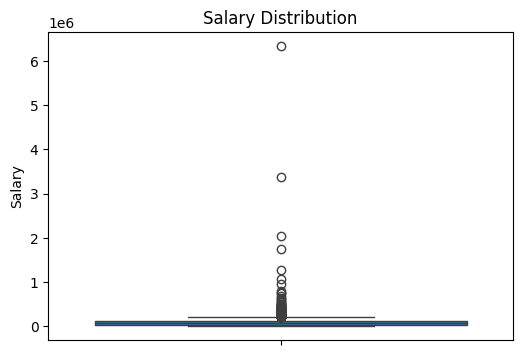

In [27]:
# Creating a Boxplot of compensation variable (target variable)
plt.figure(figsize=(6,4))
sns.boxplot(y=df['ConvertedCompYearly'])
plt.title("Salary Distribution")
plt.ylabel("Salary")
plt.show()

In [28]:
def remove_outliers(df, columns):
    """Removes rows where the specified columns contain outliers based on the IQR method,
    but only if the outliers are 5% or less of the total values in each column.

    Parameters:
    df (DataFrame): The DataFrame containing the columns to process.
    columns (list of str): A list of column names to check for outliers.

    Returns:
    DataFrame: A new DataFrame with outlier rows removed if outliers are <= 5% of the total rows.
    """
    new_df = df.copy()
    
    for column in columns:
        if column in new_df:
            # Calculate quartiles and IQR
            q1, q3 = np.percentile(new_df[column].dropna(), [25, 75])
            iqr = q3 - q1

            # Define lower and upper bounds
            lower_limit = q1 - 1.5 * iqr
            upper_limit = q3 + 1.5 * iqr

            # Identify outliers
            outliers = new_df[(new_df[column] < lower_limit) | (new_df[column] > upper_limit)]

            # If outliers are less than or equal to 5% of the total rows, remove them
            if len(outliers) <= 0.05 * len(new_df):
                new_df = new_df[(new_df[column] >= lower_limit) & (new_df[column] <= upper_limit)]
            else:
                print(f"Outliers in column '{column}' are more than 5% of total values. No outliers removed.")
    
    return new_df

In [29]:
df_cleaned = remove_outliers(df, target_column)

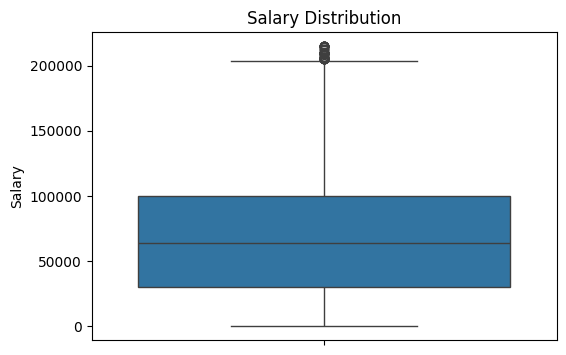

In [30]:
# Creating a Boxplot of compensation variable
plt.figure(figsize=(6,4))
sns.boxplot(y=df_cleaned['ConvertedCompYearly'])
plt.title("Salary Distribution")
plt.ylabel("Salary")
plt.show()

In [31]:
df_cleaned['Country'].value_counts()

Country
United States of America                                1298
Germany                                                  456
United Kingdom of Great Britain and Northern Ireland     432
India                                                    426
Ukraine                                                  424
                                                        ... 
Cameroon                                                   1
Mozambique                                                 1
Suriname                                                   1
Cambodia                                                   1
Cape Verde                                                 1
Name: count, Length: 140, dtype: int64

In [32]:
# Country to continent mapping
country_to_continent = {
    'Pakistan': 'Asia', 'Turkey': 'Asia', 'United States of America': 'North America', 
    'United Kingdom of Great Britain and Northern Ireland': 'Europe', 'Brazil': 'South America', 
    'South Africa': 'Africa', 'France': 'Europe', 'Canada': 'North America', 'Ukraine': 'Europe', 
    'Germany': 'Europe', 'Bolivia': 'South America', 'Morocco': 'Africa', 'India': 'Asia', 
    'Georgia': 'Asia', 'Ireland': 'Europe', 'Italy': 'Europe', 'Spain': 'Europe', 
    'Switzerland': 'Europe', 'Lithuania': 'Europe', 'Netherlands': 'Europe', 'Romania': 'Europe', 
    'Latvia': 'Europe', 'Sweden': 'Europe', 'Austria': 'Europe', 'Portugal': 'Europe', 
    'Cyprus': 'Asia', 'Czech Republic': 'Europe', 'Israel': 'Asia', 'Serbia': 'Europe', 
    'Russian Federation': 'Asia', 'Bangladesh': 'Asia', 'Denmark': 'Europe', 'Poland': 'Europe', 
    'Saudi Arabia': 'Asia', 'Mexico': 'North America', 'Bulgaria': 'Europe', 'Slovakia': 'Europe', 
    'Algeria': 'Africa', 'Venezuela, Bolivarian Republic of...': 'South America', 'Malaysia': 'Asia', 
    'Finland': 'Europe', 'Malta': 'Europe', 'Belgium': 'Europe', 'Croatia': 'Europe', 
    'Argentina': 'South America', 'Slovenia': 'Europe', 'Isle of Man': 'Europe', 'Palestine': 'Asia', 
    'Ecuador': 'South America', 'Greece': 'Europe', 'Paraguay': 'South America', 'Guatemala': 'North America', 
    'New Zealand': 'Oceania', 'Egypt': 'Africa', 'Nigeria': 'Africa', 'South Korea': 'Asia', 
    'Hungary': 'Europe', 'Peru': 'South America', 'Australia': 'Oceania', 'Philippines': 'Asia', 
    'Japan': 'Asia', 'United Arab Emirates': 'Asia', 'Thailand': 'Asia', 'Uruguay': 'South America', 
    'Hong Kong (S.A.R.)': 'Asia', 'China': 'Asia', 'Sri Lanka': 'Asia', 'Singapore': 'Asia', 
    'Armenia': 'Asia', 'Nepal': 'Asia', 'Norway': 'Europe', 'Taiwan': 'Asia', 'Lebanon': 'Asia', 
    'Iran, Islamic Republic of...': 'Asia', 'Benin': 'Africa', 'Democratic Republic of the Congo': 'Africa', 
    'Syrian Arab Republic': 'Asia', 'Namibia': 'Africa', 'Kyrgyzstan': 'Asia', "Lao People's Democratic Republic": 'Asia', 
    'Estonia': 'Europe', 'Tunisia': 'Africa', 'Viet Nam': 'Asia', 'Dominican Republic': 'North America', 
    'Burundi': 'Africa', 'Kazakhstan': 'Asia', 'Rwanda': 'Africa', 'Sierra Leone': 'Africa', 
    'Panama': 'North America', 'Cuba': 'North America', 'Costa Rica': 'North America', 'Uzbekistan': 'Asia', 
    'Colombia': 'South America', 'Ethiopia': 'Africa', 'Jordan': 'Asia', 'Jamaica': 'North America', 
    'Ghana': 'Africa', 'Andorra': 'Europe', 'Republic of North Macedonia': 'Europe', 
    'Bosnia and Herzegovina': 'Europe', 'Kuwait': 'Asia', 'Qatar': 'Asia', 'Kenya': 'Africa', 
    'Luxembourg': 'Europe', 'Belarus': 'Europe', 'Sudan': 'Africa', 'Mauritius': 'Africa', 
    'Indonesia': 'Asia', 'Afghanistan': 'Asia', 'Maldives': 'Asia', 'Kosovo': 'Europe', 
    'Angola': 'Africa', "Côte d'Ivoire": 'Africa', 'Republic of Moldova': 'Europe', 'Zambia': 'Africa', 
    'Turkmenistan': 'Asia', 'Albania': 'Europe', 'Oman': 'Asia', 'Azerbaijan': 'Asia', 'Myanmar': 'Asia', 
    'Montenegro': 'Europe', 'Chile': 'South America', 'Libyan Arab Jamahiriya': 'Africa', 
    'Nicaragua': 'North America', 'Bahrain': 'Asia', 'Bhutan': 'Asia', 'Zimbabwe': 'Africa', 
    'Iceland': 'Europe', 'Mozambique': 'Africa', 'Honduras': 'North America', 'Senegal': 'Africa', 
    'Cambodia': 'Asia', 'Iraq': 'Asia', 'Cameroon': 'Africa', 'Barbados': 'North America', 
    'United Republic of Tanzania': 'Africa', 'Suriname': 'South America', 'Cape Verde': 'Africa', 
    'El Salvador': 'North America', 'Mongolia': 'Asia', 'Nomadic': 'Other', 'Trinidad and Tobago': 'North America', 
    'Malawi': 'Africa'
}

# Mapping the country column to continents
df_cleaned['Continent'] = df_cleaned['Country'].map(country_to_continent)


In [33]:
df_cleaned = df_cleaned.drop(['Country'], axis=1)

In [34]:
print(df_cleaned['Continent'].value_counts())

Continent
Europe           3270
North America    1666
Asia             1230
South America     431
Oceania           189
Africa            188
Name: count, dtype: int64


In [35]:
# Drop row with value other in continent
df_cleaned = df_cleaned[df_cleaned['Continent'] != 'Other'].reset_index(drop=True)

In [36]:
df_cleaned['EdLevel'].unique()

array(['Some college/university study without earning a degree',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Primary/elementary school', 'Something else'], dtype=object)

In [37]:
def generalize_education(level):
    if level in ['Primary/elementary school']:
        return 'Primary'
    elif level in ['Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)']:
        return 'Secondary'
    elif level in ["Associate degree (A.A., A.S., etc.)"]:
        return "Associate"
    elif level in ["Bachelor’s degree (B.A., B.S., B.Eng., etc.)"]:
        return "Bachelor’s"
    elif level in ["Master’s degree (M.A., M.S., M.Eng., MBA, etc.)"]:
        return "Master’s"
    elif level in ["Professional degree (JD, MD, Ph.D, Ed.D, etc.)"]:
        return "Doctorate/Professional"
    elif level in ["Some college/university study without earning a degree"]:
        return "Some College"
    else:
        return "Other"

# Apply function to the column (assuming the column name is 'Edlevel')
df_cleaned['Edlevel_Simplified'] = df['EdLevel'].apply(generalize_education)

In [38]:
df_cleaned = df_cleaned.drop(['EdLevel'], axis=1)

### 5. Exploratory Data Analysis (EDA)

In [39]:
df_cleaned.columns

Index(['ResponseId', 'Age', 'RemoteWork', 'YearsCodePro', 'OrgSize', 'WorkExp',
       'Industry', 'JobSat', 'ConvertedCompYearly', 'num_languages',
       'num_databases', 'num_platforms', 'num_webframes', 'Rust', 'Go',
       'Scala', 'High_Paying_Langs', 'High_Paying_Platforms', 'Cloud_Platform',
       'Continent', 'Edlevel_Simplified'],
      dtype='object')

In [40]:
# Check Data Types
df_cleaned.dtypes

ResponseId                 int64
Age                       object
RemoteWork                object
YearsCodePro              object
OrgSize                   object
WorkExp                  float64
Industry                  object
JobSat                   float64
ConvertedCompYearly      float64
num_languages              int64
num_databases              int64
num_platforms              int64
num_webframes              int64
Rust                       int64
Go                         int64
Scala                      int64
High_Paying_Langs          int64
High_Paying_Platforms      int64
Cloud_Platform             int64
Continent                 object
Edlevel_Simplified        object
dtype: object

- Age is category: later in section feature engineering i will change it to code.
- YearsCode and YearsCodePro are object type however they have values in numbers i will transform them to integers.
- Another object variables (Age,Currency, OrgSize, EdLevel_simplified, role_category, Industry, continent) I will encode them in the feature engineering section for using them in the model phase.
- Object variables such as remote work, main language, main database, main platform and main webframe I will tranform them to binarys in the feature engineering section. 


In [41]:
# Map age ranges to numerical values (midpoints)
age_mapping = {
    "Under 18 years old": 16,
    "18-24 years old": 21,
    "25-34 years old": 30,
    "35-44 years old": 40,
    "45-54 years old": 50,
    "55-64 years old": 60,
    "Prefer not to say": np.nan  # Handle unknown values as NaN
}

df_cleaned["Age_Num"] = df_cleaned["Age"].map(age_mapping)



In [42]:
# Replace special values with numeric equivalents for YearsCode and YearsCodePro
df_cleaned[['YearsCodePro']] = df_cleaned[['YearsCodePro']].replace({
    'More than 50 years': 51,
    'Less than 1 year': 0
})

# Convert both columns to integers
df_cleaned[['YearsCodePro']] = df_cleaned[['YearsCodePro']].apply(pd.to_numeric, errors='coerce', downcast='integer')

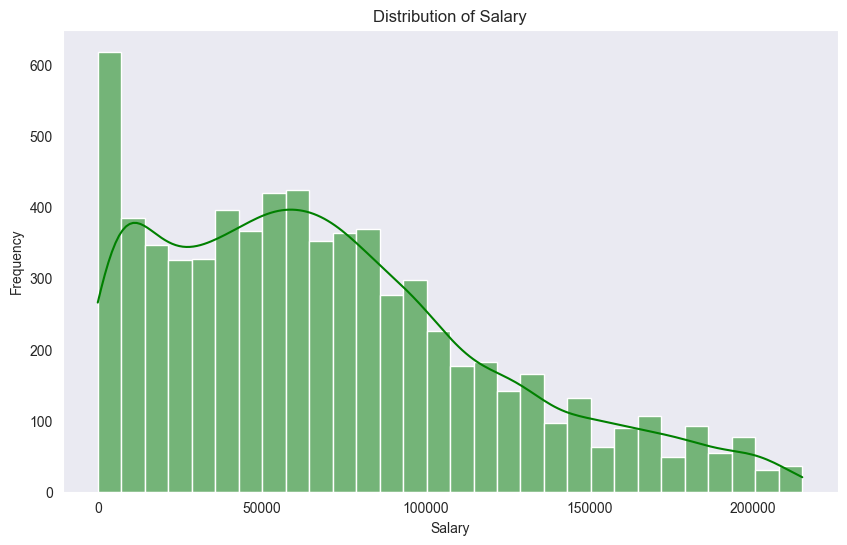

In [43]:
# Target variable
# Histogram of Salary distribution
sns.set_style('dark')
plt.figure(figsize=(10,6))
sns.histplot(df_cleaned['ConvertedCompYearly'], kde=True, color='green', bins=30)
plt.title('Distribution of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

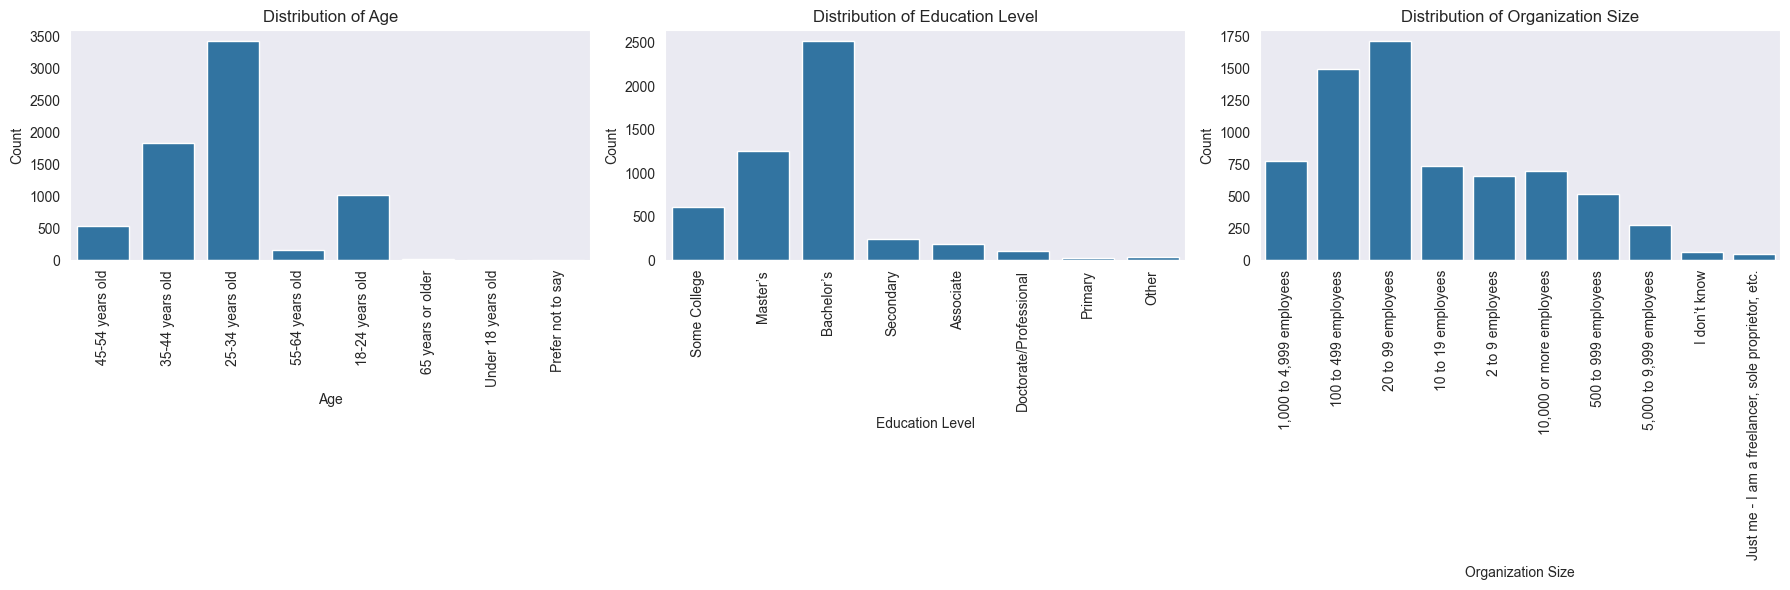

In [44]:
# Age, Education Level and Organization Size
# Create a figure with subplots to display all 3 bar charts
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot for 'Age'
sns.countplot(x='Age', data=df_cleaned, ax=axes[0])
axes[0].set_title('Distribution of Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=90)

# Plot for 'Edlevel'
sns.countplot(x='Edlevel_Simplified', data=df_cleaned, ax=axes[1])
axes[1].set_title('Distribution of Education Level')
axes[1].set_xlabel('Education Level')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=90)

# Plot for 'OrgSize'
sns.countplot(x='OrgSize', data=df_cleaned, ax=axes[2])
axes[2].set_title('Distribution of Organization Size')
axes[2].set_xlabel('Organization Size')
axes[2].set_ylabel('Count')
axes[2].tick_params(axis='x', rotation=90)

# Adjust layout
plt.tight_layout()
plt.show()

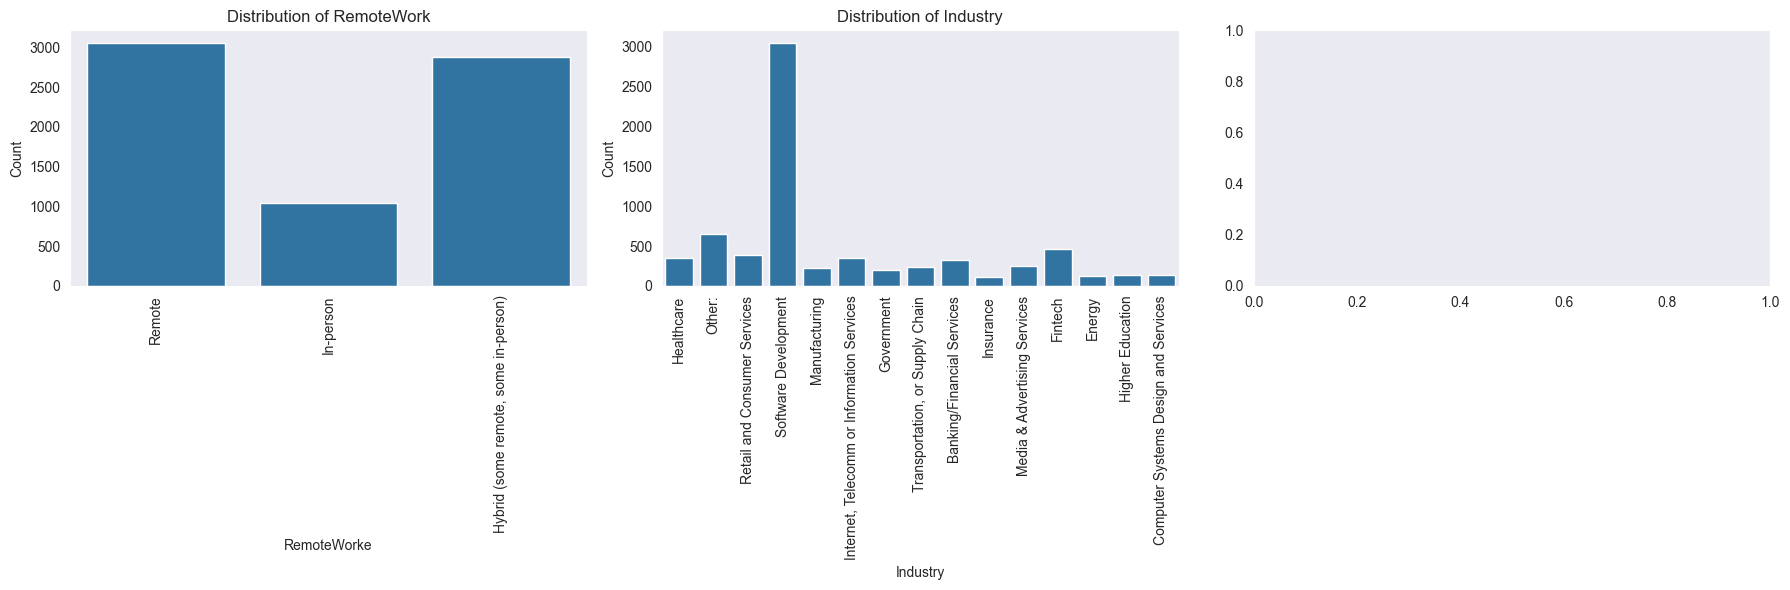

In [45]:
# Age, Education Level and Organization Size
# Create a figure with subplots to display all 3 bar charts
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot for 'Age'
sns.countplot(x='RemoteWork', data=df_cleaned, ax=axes[0])
axes[0].set_title('Distribution of RemoteWork')
axes[0].set_xlabel('RemoteWorke')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=90)

# Plot for 'Edlevel'
sns.countplot(x='Industry', data=df_cleaned, ax=axes[1])
axes[1].set_title('Distribution of Industry')
axes[1].set_xlabel('Industry')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=90)


# Adjust layout
plt.tight_layout()
plt.show()

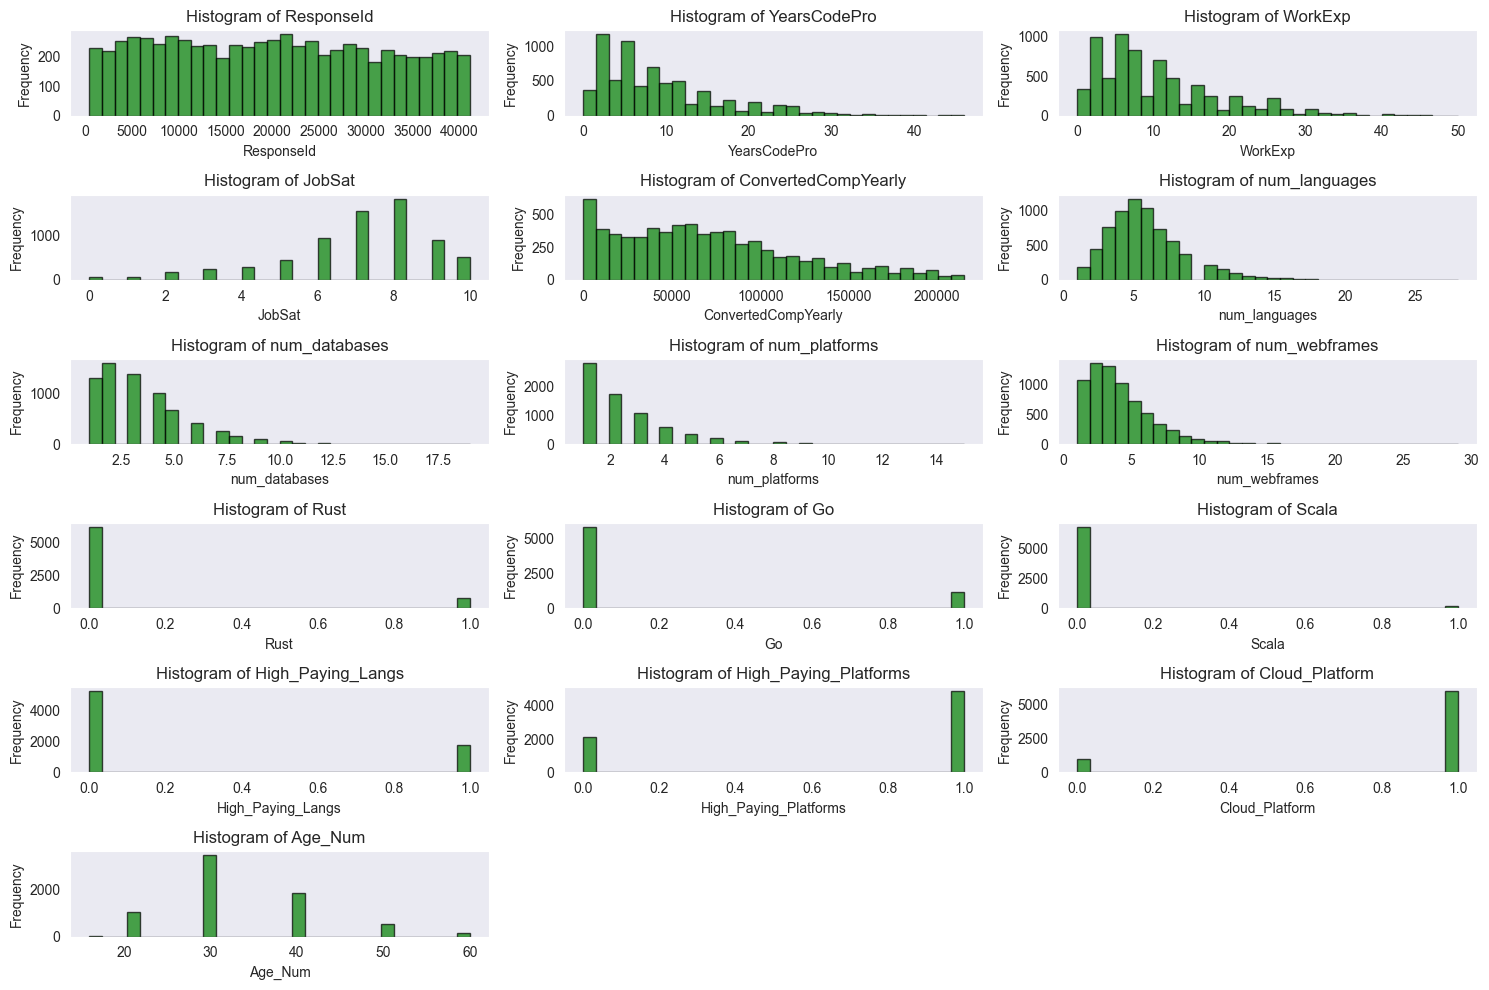

In [46]:
# Select numeric columns
numeric_cols = df_cleaned.select_dtypes(include=['number']).columns

# Set plot size
plt.figure(figsize=(15, 10))

# Loop through numeric columns and create histograms
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols) // 3 + 1, 3, i)  # Adjust for layout
    plt.hist(df_cleaned[col], bins=30, alpha=0.7, color='green', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

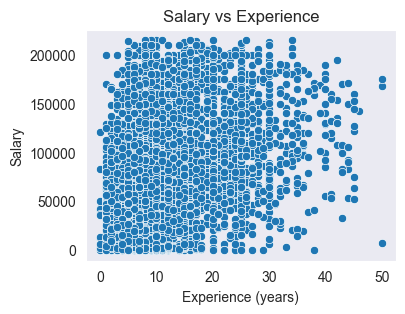

In [47]:
# Scatter plot of Salary vs Experience (assuming 'Experience' is a variable)
plt.figure(figsize=(4,3))
sns.scatterplot(x=df_cleaned['WorkExp'], y=df_cleaned['ConvertedCompYearly'])
plt.title('Salary vs Experience')
plt.xlabel('Experience (years)')
plt.ylabel('Salary')
plt.show()

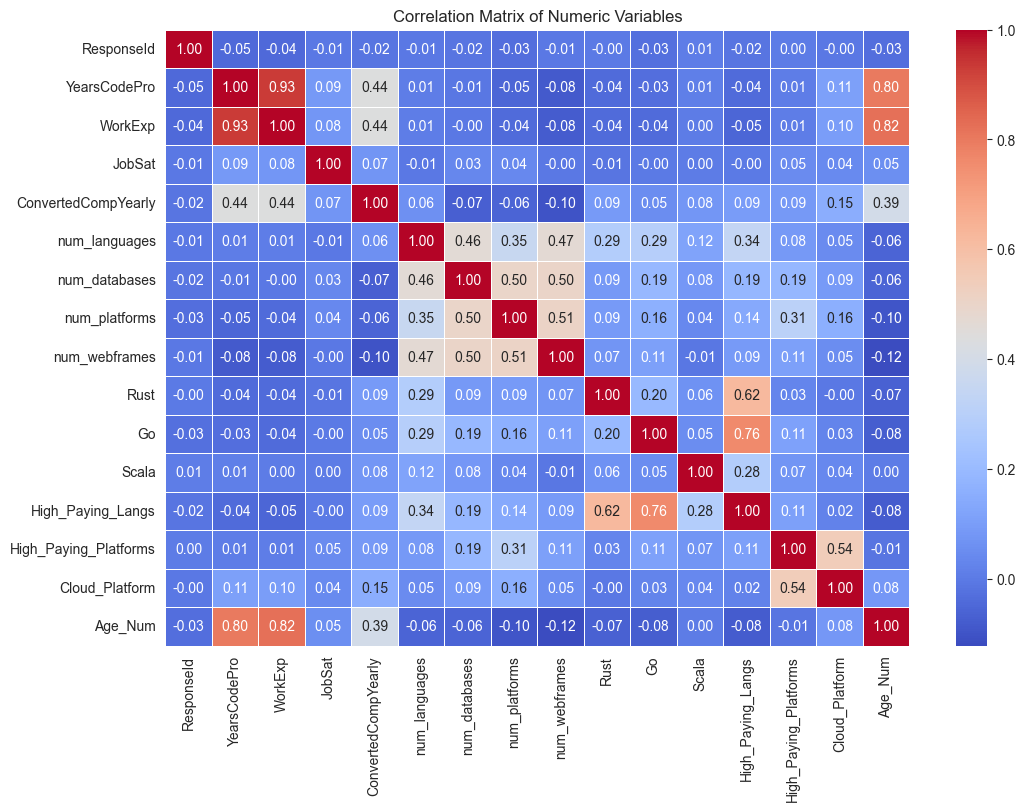

In [48]:
# Compute correlation matrix for numeric variables
correlation_matrix = df_cleaned.corr(numeric_only=True)

# Set figure size
plt.figure(figsize=(12, 8))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Title of the heatmap
plt.title("Correlation Matrix of Numeric Variables")

# Show the plot
plt.show()


From the numeric variables correlation analysis we could see that potential influential variables for our model (some correlation with Salary) are YearsCodePro, WorkExp and Age but since years code pro and  work experience are highly correlated I will keep only work experience variable and age variable.

In [50]:
df_cleaned.columns

Index(['ResponseId', 'Age', 'RemoteWork', 'YearsCodePro', 'OrgSize', 'WorkExp',
       'Industry', 'JobSat', 'ConvertedCompYearly', 'num_languages',
       'num_databases', 'num_platforms', 'num_webframes', 'Rust', 'Go',
       'Scala', 'High_Paying_Langs', 'High_Paying_Platforms', 'Cloud_Platform',
       'Continent', 'Edlevel_Simplified', 'Age_Num'],
      dtype='object')

In [51]:
columns_to_drop = ['YearsCodePro' ,'num_databases', 'num_platforms', 'num_databases','Rust', 'Go']

df_cleaned = df_cleaned.drop(columns= columns_to_drop)

### 6. Feature Engineering 

In [52]:
df_cleaned.columns

Index(['ResponseId', 'Age', 'RemoteWork', 'OrgSize', 'WorkExp', 'Industry',
       'JobSat', 'ConvertedCompYearly', 'num_languages', 'num_webframes',
       'Scala', 'High_Paying_Langs', 'High_Paying_Platforms', 'Cloud_Platform',
       'Continent', 'Edlevel_Simplified', 'Age_Num'],
      dtype='object')

In [53]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6982 entries, 0 to 6981
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ResponseId             6982 non-null   int64  
 1   Age                    6982 non-null   object 
 2   RemoteWork             6982 non-null   object 
 3   OrgSize                6982 non-null   object 
 4   WorkExp                6982 non-null   float64
 5   Industry               6982 non-null   object 
 6   JobSat                 6982 non-null   float64
 7   ConvertedCompYearly    6982 non-null   float64
 8   num_languages          6982 non-null   int64  
 9   num_webframes          6982 non-null   int64  
 10  Scala                  6982 non-null   int64  
 11  High_Paying_Langs      6982 non-null   int64  
 12  High_Paying_Platforms  6982 non-null   int64  
 13  Cloud_Platform         6982 non-null   int64  
 14  Continent              6974 non-null   object 
 15  Edle

In [54]:
# Feature Engineering: Creating new features
df_cleaned['Experience_per_Age'] = df_cleaned['WorkExp'] / df_cleaned['Age_Num']  # Ratio of experience to age

In [55]:
df_cleaned['Edlevel_Simplified'].value_counts()

Edlevel_Simplified
Bachelor’s                2518
Master’s                  1260
Some College               612
Secondary                  245
Associate                  186
Doctorate/Professional     107
Other                       40
Primary                     23
Name: count, dtype: int64

In [56]:
# Converting education levels to ordered categories
education_mapping = {
    "Primary": 1,
    "Secondary": 1,
    "Some College": 1,
    "Other": 1,
    "Bachelor’s": 3,
    "Master’s": 4,
    "Associate": 2,
    "Doctorate/Professional": 5
}

df_cleaned["Edlevel_Simplified"] = df_cleaned["Edlevel_Simplified"].map(education_mapping)


In [57]:
df_cleaned.dtypes

ResponseId                 int64
Age                       object
RemoteWork                object
OrgSize                   object
WorkExp                  float64
Industry                  object
JobSat                   float64
ConvertedCompYearly      float64
num_languages              int64
num_webframes              int64
Scala                      int64
High_Paying_Langs          int64
High_Paying_Platforms      int64
Cloud_Platform             int64
Continent                 object
Edlevel_Simplified       float64
Age_Num                  float64
Experience_per_Age       float64
dtype: object

In [58]:
# Encode categorical variables
categorical_cols = ["RemoteWork", "OrgSize", "Industry", "Continent"]
for col in categorical_cols:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col].astype(str))
    print(f"Mapping for {col}: {dict(zip(le.classes_, le.transform(le.classes_)))}")

Mapping for RemoteWork: {'Hybrid (some remote, some in-person)': np.int64(0), 'In-person': np.int64(1), 'Remote': np.int64(2)}
Mapping for OrgSize: {'1,000 to 4,999 employees': np.int64(0), '10 to 19 employees': np.int64(1), '10,000 or more employees': np.int64(2), '100 to 499 employees': np.int64(3), '2 to 9 employees': np.int64(4), '20 to 99 employees': np.int64(5), '5,000 to 9,999 employees': np.int64(6), '500 to 999 employees': np.int64(7), 'I don’t know': np.int64(8), 'Just me - I am a freelancer, sole proprietor, etc.': np.int64(9)}
Mapping for Industry: {'Banking/Financial Services': np.int64(0), 'Computer Systems Design and Services': np.int64(1), 'Energy': np.int64(2), 'Fintech': np.int64(3), 'Government': np.int64(4), 'Healthcare': np.int64(5), 'Higher Education': np.int64(6), 'Insurance': np.int64(7), 'Internet, Telecomm or Information Services': np.int64(8), 'Manufacturing': np.int64(9), 'Media & Advertising Services': np.int64(10), 'Other:': np.int64(11), 'Retail and Consu

In [59]:
df_cleaned = df_cleaned.dropna()

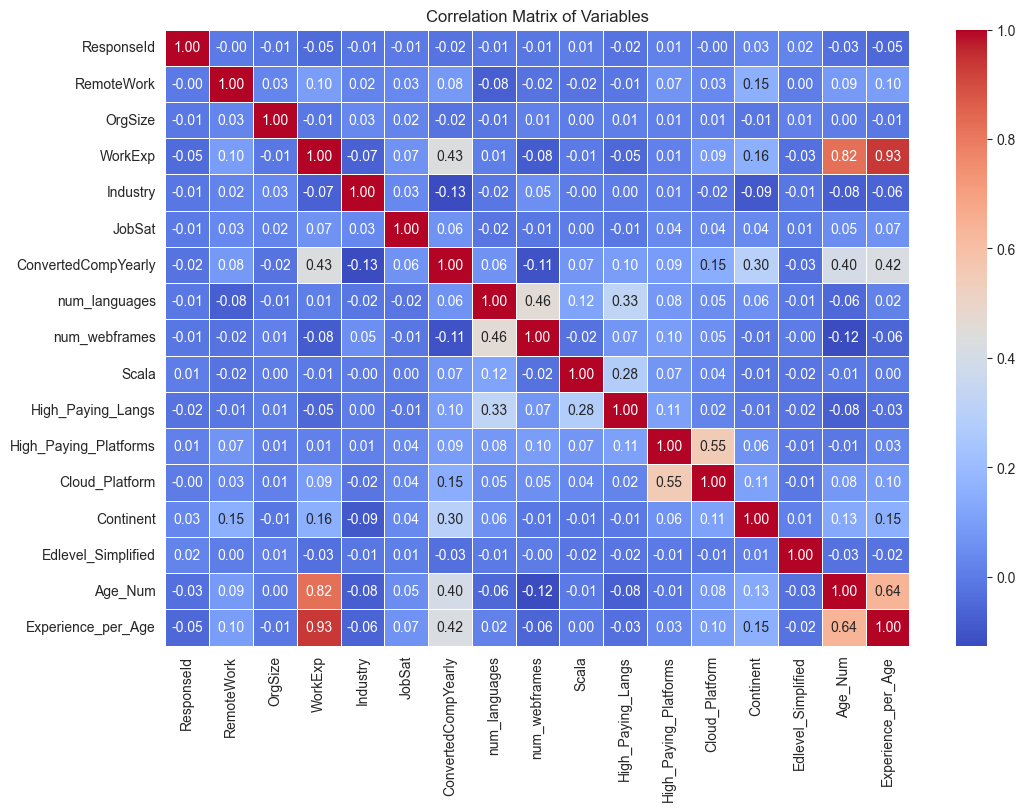

In [60]:
# Compute correlation matrix for numeric variables
correlation_matrix = df_cleaned.corr(numeric_only=True)

# Set figure size
plt.figure(figsize=(12, 8))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Title of the heatmap
plt.title("Correlation Matrix of Variables")

# Show the plot
plt.show()

In [62]:
# Define features and target variable
X = df_cleaned.drop(columns=["ConvertedCompYearly", "ResponseId","Age_Num",'Age','RemoteWork','OrgSize','Edlevel_Simplified'])
y = df_cleaned["ConvertedCompYearly"]


In [63]:
X

,WorkExp,Industry,JobSat,num_languages,num_webframes,Scala,High_Paying_Langs,High_Paying_Platforms,Cloud_Platform,Continent,Experience_per_Age
4,10.0,13,9.0,5,2,0,0,1,1,2,0.333333
5,10.0,11,6.0,5,2,0,0,1,1,3,0.200000
8,12.0,9,5.0,4,4,0,0,1,1,5,0.400000
9,4.0,8,8.0,4,3,0,0,1,1,3,0.133333
11,17.0,5,6.0,5,2,0,0,0,1,3,0.425000
...,...,...,...,...,...,...,...,...,...,...,...
6977,24.0,3,9.0,5,5,0,0,0,1,3,0.480000
6978,20.0,13,10.0,9,8,0,0,1,1,5,0.500000
6979,26.0,3,8.0,6,3,1,1,1,1,2,0.520000
6980,13.0,6,8.0,11,5,0,0,1,1,3,0.325000


### 7. Splitting Data into Training & Testing Sets

In [64]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=38)

In [65]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 8. Model Training

In [73]:
# Linear Regression Model
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
y_pred_lr = lin_reg.predict(X_test_scaled)

In [67]:
# Random Forest Model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

### 9. Model Performance Metrics

In [82]:
def evaluate_model(y_test, y_pred, model_name):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_test, y_pred)

    results = {
        "Model": model_name,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R2 Score": r2,
    }
    
    print(f"{model_name} - MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, R2: {r2:.2f}")
    return results


results_lr = evaluate_model(y_test, y_pred_lr, "Linear Regression")
results_rf = evaluate_model(y_test, y_pred_rf, "Random Forest")

Linear Regression - MAE: 33278.16, MSE: 1932470354.83, RMSE: 43959.87, R2: 0.27
Random Forest - MAE: 26855.46, MSE: 1304590182.35, RMSE: 36119.11, R2: 0.51


C:\Users\Carolina\AppData\Local\Temp\ipykernel_21376\2803405883.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(df.index, rotation=20)
C:\Users\Carolina\AppData\Local\Temp\ipykernel_21376\2803405883.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(df.index, rotation=20)
C:\Users\Carolina\AppData\Local\Temp\ipykernel_21376\2803405883.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(df.index, rotation=20)
C:\Users\Carolina\AppData\Local\Temp\ipykernel_21376\2803405883.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(df.index, rotation=20)


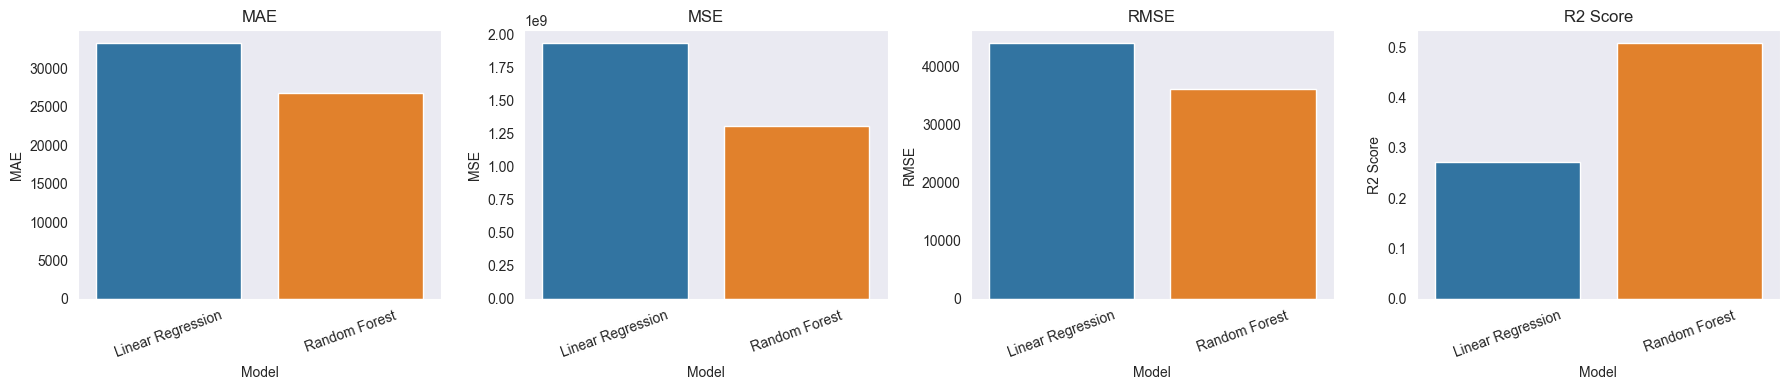

In [84]:
def plot_model_performance(results_list):
    """
    Plots bar charts comparing different models' performance metrics.

    Parameters:
        results_list (list of dicts): List of model evaluation results from evaluate_model function.
    """
    df = pd.DataFrame(results_list)
    df.set_index("Model", inplace=True)
    
    # Define metrics to plot
    metrics = ["MAE", "MSE", "RMSE", "R2 Score"]
    
    fig, axes = plt.subplots(1, len(metrics), figsize=(18, 4))

    for i, metric in enumerate(metrics):
        sns.barplot(x=df.index, y=df[metric], ax=axes[i], hue=df.index)
        axes[i].set_title(metric)
        axes[i].set_ylabel(metric)
        axes[i].set_xticklabels(df.index, rotation=20)
    
    plt.tight_layout()
    plt.show()


results_list = [results_lr, results_rf]  
plot_model_performance(results_list)

In [69]:
# Get the lin reg model coefficients 
coefficients = lin_reg.coef_  # The slope (or weight) for each feature
intercept = lin_reg.intercept_  # The y-intercept

# Print coefficients with corresponding feature names
for feature, coef in zip(X.columns, coefficients):
    print(f"Feature: {feature}, Coefficient: {coef}")
print(f'Intercept: {intercept}')

Feature: WorkExp, Coefficient: 11626.033804743116
Feature: Industry, Coefficient: -3940.324594271551
Feature: JobSat, Coefficient: 1198.6582400485402
Feature: num_languages, Coefficient: 2797.562506620346
Feature: num_webframes, Coefficient: -5110.449471599692
Feature: Scala, Coefficient: 2154.4071667519074
Feature: High_Paying_Langs, Coefficient: 4616.337205874278
Feature: High_Paying_Platforms, Coefficient: 969.1582543133344
Feature: Cloud_Platform, Coefficient: 4030.1870430526888
Feature: Continent, Coefficient: 11315.486548398607
Feature: Experience_per_Age, Coefficient: 7630.351508317476
Intercept: 70277.23011292347


In [ ]:

def plot_lr_feature_importance(model, feature_names):
    """
    Plots the feature importance for a Linear Regression model.
    
    Parameters:
        model: Trained Linear Regression model (e.g., sklearn's LinearRegression)
        feature_names: List of feature names used in training the model
    """
    # Get coefficients
    coef = model.coef_
    
    # Create DataFrame
    coef_df = pd.DataFrame({"Feature": feature_names, "Coefficient": coef})
    coef_df = coef_df.sort_values(by="Coefficient", key=abs, ascending=False)  # Sort by absolute value
    
    # Plot
    plt.figure(figsize=(10, 5))
    plt.barh(coef_df["Feature"], coef_df["Coefficient"], color=np.where(coef_df["Coefficient"] > 0, "green", "red"))
    plt.xlabel("Coefficient Value")
    plt.ylabel("Feature")
    plt.title("Feature Importance in Linear Regression Model")
    plt.axvline(x=0, color="black", linestyle="--", linewidth=1)  
    plt.gca().invert_yaxis() 
    plt.show()




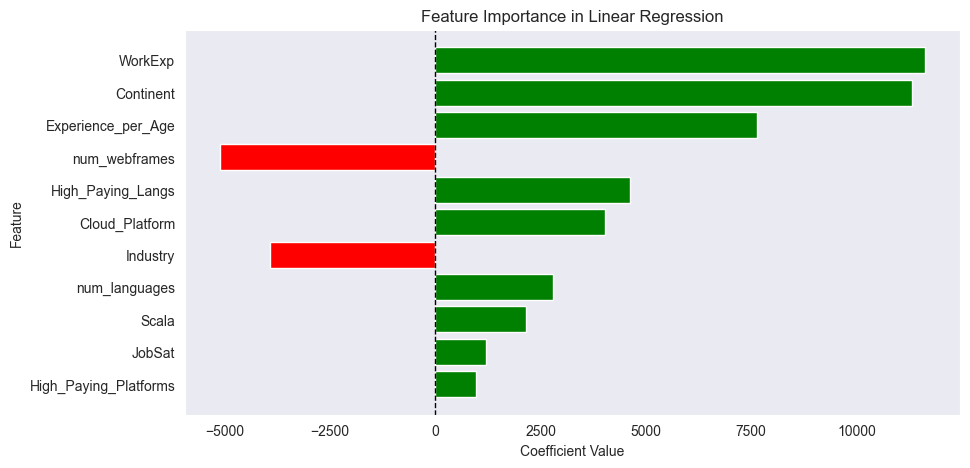

In [86]:
feature_names = X_train.columns  
plot_lr_feature_importance(lin_reg, feature_names)


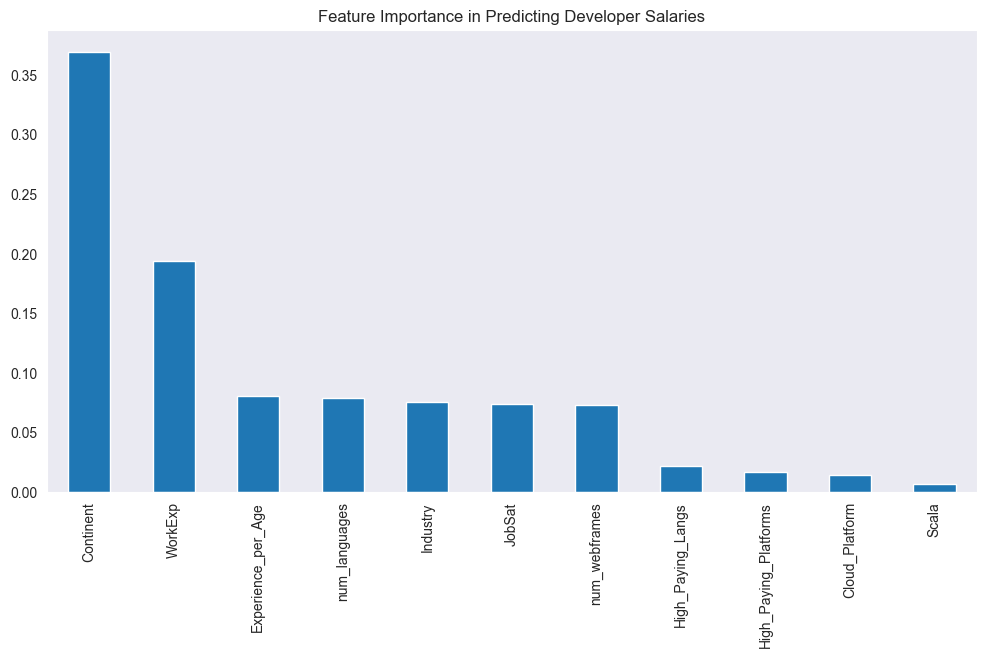

In [70]:
# Feature Importance (Random Forest)
feature_importance = pd.Series(rf.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False).plot(kind='bar', figsize=(12, 6))
plt.title("Feature Importance in Predicting Developer Salaries")
plt.show()

### 10. Conclusion & Future Work

- Continent was highly in teh Random Forest Model, so maybe it would be a goof idea to split by continent and try a model per continent. 
- Work Experience was 